In [ ]:
install.packages("urca")
library(urca)
install.packages("egcm")
library(egcm)
install.packages("mAr")
library(mAr)

#Загрузка и визуализация данных

In [2]:
  data <- read.csv('var_14.csv',header = T)
  head(data)

,X1,X2,X3,X4,X5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-93.31332,-36.87343,-37.30853,-36.34800,-46.25821
2,-93.89768,-37.59775,-37.96304,-35.38632,-41.22192
3,-92.27589,-33.12733,-38.85003,-36.12713,-42.33159
4,-92.63583,-32.80640,-34.26832,-37.90438,-38.94340
5,-91.61012,-30.53114,-29.17398,-36.93168,-41.21819
6,-94.13410,-32.85232,-29.82316,-31.26055,-44.44061


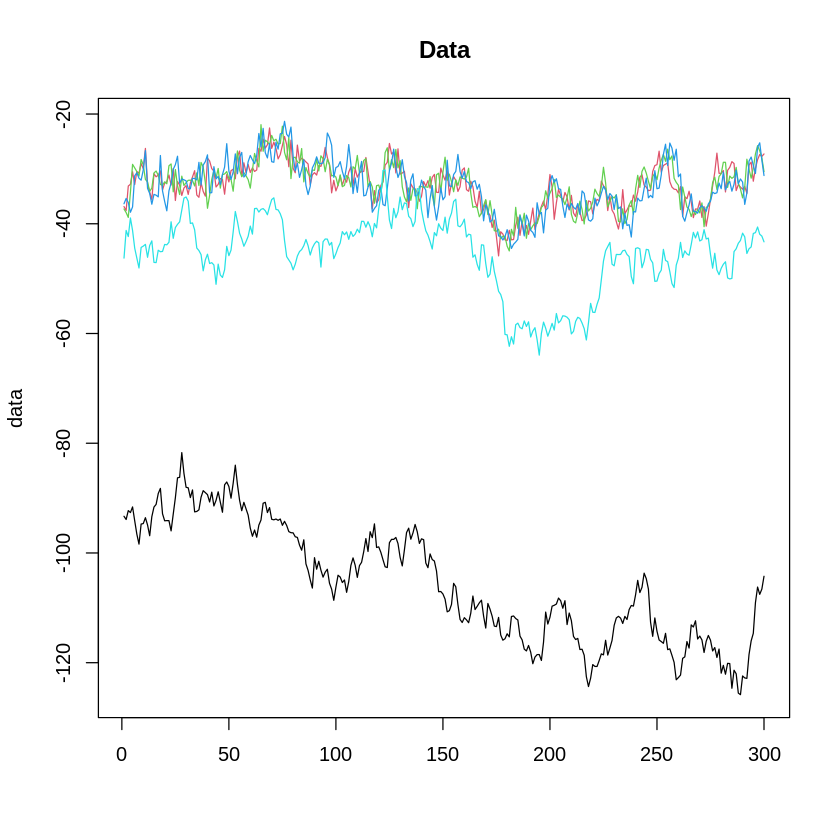

In [4]:
  matplot(data,type = "l",lty = 1,col = 1:dim(data)[2],main = "Data")

# Оценим модель коинтеграции

In [5]:
vecm <- ca.jo(data, ecdet = "none",type="eigen",K=2,spec="longrun")

In [15]:
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.417158235 0.258600959 0.067698169 0.027952990 0.009007645

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 4 |   2.70  6.50  8.18 11.65
r <= 3 |   8.45 12.91 14.90 19.19
r <= 2 |  20.89 18.90 21.07 25.75
r <= 1 |  89.17 24.78 27.14 32.14
r = 0  | 160.87 30.84 33.32 38.78

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            X1.l2      X2.l2      X3.l2      X4.l2     X5.l2
X1.l2   1.0000000    1.00000   1.000000  1.0000000 1.0000000
X2.l2 -44.2346063  701.39189  -9.451895 -0.4057089 0.5033633
X3.l2  56.8546271  118.47430 -12.272986 -0.4387956 0.3534546
X4.l2 -13.5022941 -745.87856  -8.166280 -0.4097020 0.2449224
X5.l2  -0.3860663  -31.75235  15.126754 -1.2904161 0.4982768

Weights W:
(This is the loading matrix)

             X

In [6]:
vecm@cval

,10pct,5pct,1pct
r <= 4 |,6.50,8.18,11.65
r <= 3 |,12.91,14.90,19.19
r <= 2 |,18.90,21.07,25.75
r <= 1 |,24.78,27.14,32.14
r = 0 |,30.84,33.32,38.78


In [7]:
vecm@teststat

[1]   2.696441   8.448631  20.889402  89.166452 160.872184

In [10]:
vecm@cval[,2]

r <= 4 | r <= 3 | r <= 2 | r <= 1 | r = 0  | 
    8.18    14.90    21.07    27.14    33.32

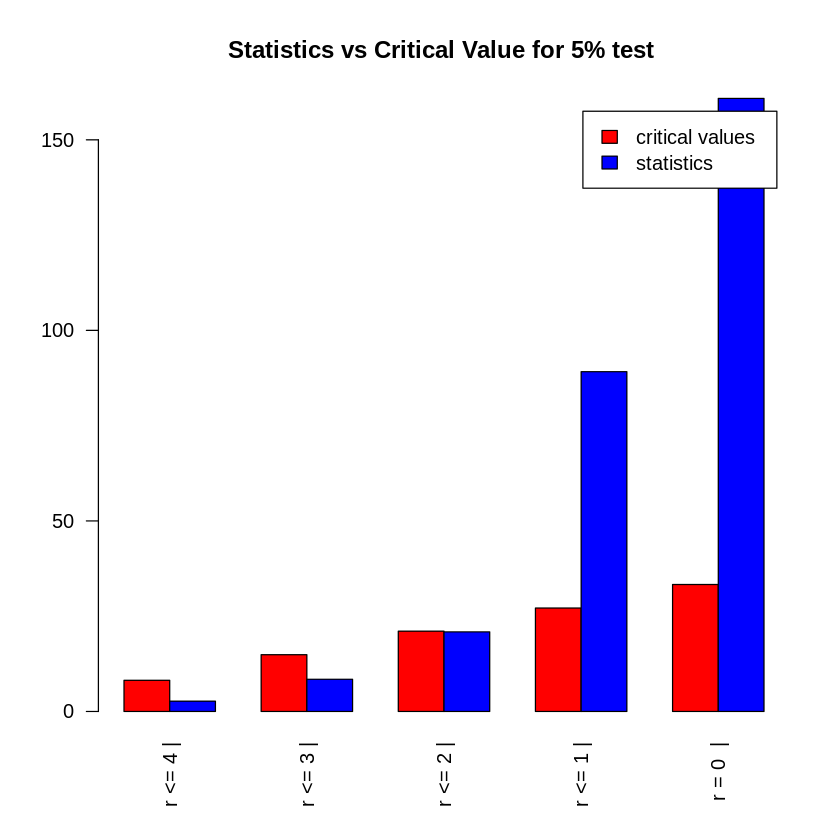

In [9]:
outmat <-rbind(vecm@cval[,2],vecm@teststat)
legends <- c("critical values","statistics")
barplot(outmat, main="Statistics vs Critical Value for 5% test ",legend.text = legends,beside = TRUE, col=c("red","blue"), las=2)

Проверка гипотезы о порядке коинтеграции показывает, что порядок коинтеграции в нашей смоделированной 4-мерной системе векторов $y_t,h≤2$
.

# вектор lambda- собственные значения $\lambda_1,...,\lambda_n$ матрицы $Σ=Σ^{-1}_{vv}Σ_{uv}Σ^{−1}_{uu}Σ_{uv}$


Оценка модели коинтеграции  

Сначала идет 2-х шаговый МНК

1.1 Оценки параметров множественной регрессионной модели связи Δy_t
 с $Δy_{t−1},Δy_{t−2},...Δy_{t−p+1}$

$Δy_t=π+Π_1Δy_{t−1}...+Π_{p−1}Δy_{t−p+1}+u_t$

1.2 Оценки параметров множественной регрессионной модели связи
y_t
 $с Δy_{t−1},Δy_{t−2},...Δy_{t−p+1}$

$y_t=θ+Λ_1Δy_{t−1}...+Λ_{p−1}Δy_{t−p+1}+v_t$

2.1 Здесь вычисляется ковариационные матрицы остатков

$Σ_{vv}=cov(v_i,v_j);i,j=1,...,n$

$Σ_{uu}=cov(u_i,u_j);i,j=1,...,n$

$Σ_{uv}=cov(u_i,v_j);i,j=1,...,n$

$Σ_{vu}=Σ_{uv}′$



In [11]:
vecm@lambda

[1] 0.417158235 0.258600959 0.067698169 0.027952990 0.009007645

# Коинтегрирующие вектора

Порядок приняли равным двум a=(a1,a2).
Проверим визуально

In [21]:
a<- vecm@V[,1:2]
a

,X1.l2,X2.l2
X1.l2,1.0000000,1.00000
X2.l2,-44.2346063,701.39189
X3.l2,56.8546271,118.47430
X4.l2,-13.5022941,-745.87856
X5.l2,-0.3860663,-31.75235


Линейная кобинация с первым вектором на вид стационарна.

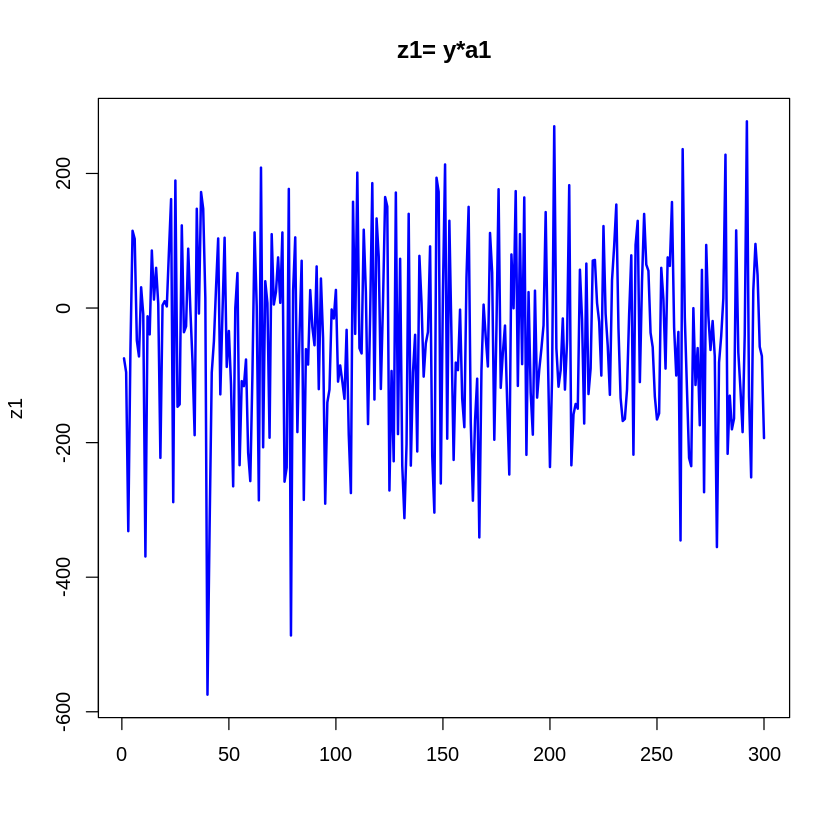

In [37]:
z1 <- as.matrix(data)%*%vecm@V[,1]
 matplot(z1,type ="l",col = "blue",lwd = 2,main ='z1= y*a1')

Линейная кобинация с вторым вектором на вид стационарна.

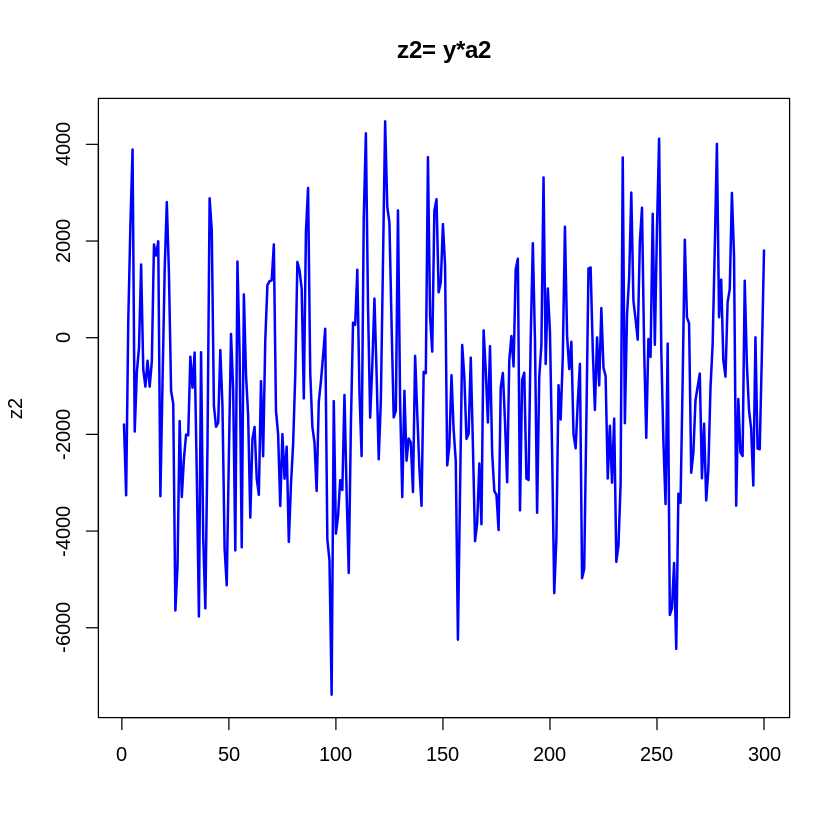

In [36]:
z2 <- as.matrix(data)%*%vecm@V[,2]
 matplot(z2,type ="l",col = "blue",lwd = 2,main ='z2= y*a2')

Линейная кобинация с третьим вектором уже содержит явный тренд и не следовательно является стационарной. Таким образом наша гипотеза о порядке коинтеграции h=2
не отвергается и в результате визуального теста.

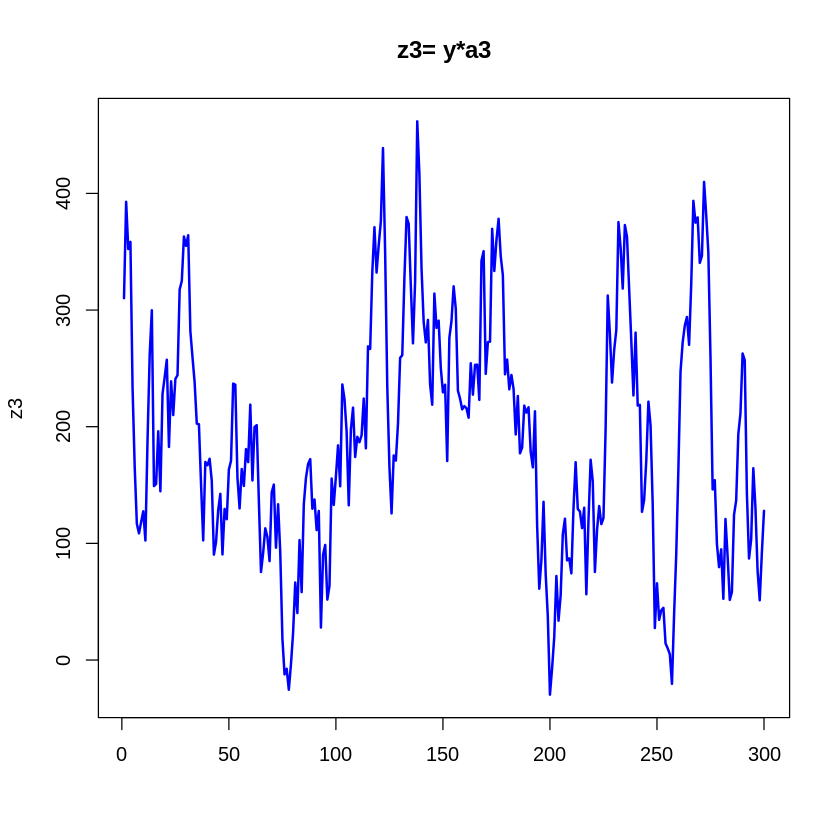

In [38]:
z3 <- as.matrix(data)%*%vecm@V[,3]
 matplot(z3,type ="l",col = "blue",lwd = 2,main ='z3= y*a3')